# Libraries and Data

In [ ]:
# Changing directory
%cd /content/drive/MyDrive/Conjoint Analysis

/content/drive/MyDrive/Conjoint Analysis


In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
#for treemap
!pip install squarify
import squarify

In [ ]:
#Data
df = pd.read_csv('netflix_customer_survey.csv')
df.head()

,customerid,NumberAccounts,price,ExtraContent,ads,selected
0,7,2,10,HBO,one_per_day,1
1,7,6,8,Marvel,one_per_show,1
2,7,4,15,Disney,one_per_day,1
3,7,5,10,HBO,one_per_day,1
4,7,1,20,Soccer,one_per_show,1


In [ ]:
#Shape
df.shape

(3000, 6)

In [ ]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customerid      3000 non-null   int64 
 1   NumberAccounts  3000 non-null   int64 
 2   price           3000 non-null   int64 
 3   ExtraContent    3000 non-null   object
 4   ads             3000 non-null   object
 5   selected        3000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 140.8+ KB


In [ ]:
#Statistical summary of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customerid,3000.0,454.129333,254.410396,7.0,237.0,449.0,669.0,900.0
NumberAccounts,3000.0,3.589000,1.726385,1.0,2.0,4.0,5.0,6.0
price,3000.0,13.769000,4.225351,8.0,10.0,12.0,18.0,20.0
selected,3000.0,0.498000,0.500079,0.0,0.0,0.0,1.0,1.0


In [ ]:
#Statistical summary of non-numerical columns
df.describe(include='object').T

,count,unique,top,freq
ExtraContent,3000,6,Marvel,519
ads,3000,3,none,1031


In [ ]:
#Extra content categories
df.value_counts('ExtraContent')

ExtraContent
Marvel             519
HBO                510
Soccer             505
less content       505
Prime originals    486
Disney             475
dtype: int64

In [ ]:
#Ads categories
df.value_counts('ads')

ads
none            1031
one_per_show     990
one_per_day      979
dtype: int64

In [ ]:
#Number of accounts
df.value_counts('NumberAccounts')

NumberAccounts
6    556
4    520
5    509
1    490
3    466
2    459
dtype: int64

In [ ]:
#Selected - target variable
df.value_counts('selected')

selected
0    1506
1    1494
dtype: int64

# Preparing the data

In [ ]:
#Isolate X & y
y = df['selected']
X = df.drop(columns = ['selected','customerid'])
X.head()

,NumberAccounts,price,ExtraContent,ads
0,2,10,HBO,one_per_day
1,6,8,Marvel,one_per_show
2,4,15,Disney,one_per_day
3,5,10,HBO,one_per_day
4,1,20,Soccer,one_per_show


In [ ]:
#Dummy variables
X_dummy = pd.get_dummies(X, columns = X.columns)
X_dummy.head()

,NumberAccounts_1,NumberAccounts_2,NumberAccounts_3,NumberAccounts_4,NumberAccounts_5,NumberAccounts_6,price_8,price_10,price_12,price_15,...,price_20,ExtraContent_Disney,ExtraContent_HBO,ExtraContent_Marvel,ExtraContent_Prime originals,ExtraContent_Soccer,ExtraContent_less content,ads_none,ads_one_per_day,ads_one_per_show
0,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


# Logistic Regression

In [ ]:
#Building model
model = sm.OLS(y, X_dummy, family=sm.families.Binomial()).fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               selected   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     16.03
Date:                Tue, 26 Sep 2023   Prob (F-statistic):           9.96e-46
Time:                        04:29:08   Log-Likelihood:                -2046.2
No. Observations:                3000   AIC:                             4128.
Df Residuals:                    2982   BIC:                             4237.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
NumberAccounts_1                -0.0600      0.020     -3.012      0.003      -0.099      -0.021
NumberAccounts_2                 0.0826      0.020      4.031      0.000       0.042       0.123
NumberAccounts_3                 0.0947      0.020      4.657      0.000       0.055       0.135
NumberAccounts_4                 0.1289      0.019      6.641      0.000       0.091       0.167
NumberAccounts_5                 0.1306      0.020      6.670      0.000       0.092       0.169
NumberAccounts_6                 0.2152      0.019     11.421      0.000       0.178       0.252
price_8                          0.1693      0.020      8.619      0.000       0.131       0.208
price_10                         0.1508      0.020      7.513      0.000       0.111       0.190
price_12                         0.1465      0.019      7.689      0.000       0.109       0.184
price_15                         0.1042      0.020      5.335      0.000       0.066       0.143
price_18                         0.0754      0.020      3.739      0.000       0.036       0.115
price_20                        -0.0543      0.020     -2.722      0.007      -0.093      -0.015
ExtraContent_Disney              0.1530      0.020      7.579      0.000       0.113       0.193
ExtraContent_HBO                 0.1534      0.020      7.824      0.000       0.115       0.192
ExtraContent_Marvel              0.1337      0.019      6.885      0.000       0.096       0.172
ExtraContent_Prime originals     0.1298      0.020      6.503      0.000       0.091       0.169
ExtraContent_Soccer              0.0523      0.020      2.665      0.008       0.014       0.091
ExtraContent_less content       -0.0301      0.020     -1.531      0.126      -0.069       0.008
ads_none                         0.2488      0.013     19.538      0.000       0.224       0.274
ads_one_per_day                  0.2258      0.013     17.336      0.000       0.200       0.251
ads_one_per_show                 0.1175      0.013      9.060      0.000       0.092       0.143
==============================================================================
Omnibus:                    13769.665   Durbin-Watson:                   2.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              351.845
Skew:                          -0.010   Prob(JB):                     3.96e-77
Kurtosis:                       1.322   Cond. No.                     6.94e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.2e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Conjoint Analysis Preparation

In [ ]:
#DF with results
df_results = pd.DataFrame({'param_name': model.params.keys(),
                            'partworth': model.params.values,
                            'pval': model.pvalues})
df_results.head()

,param_name,partworth,pval
NumberAccounts_1,NumberAccounts_1,-0.059992,2.614658e-03
NumberAccounts_2,NumberAccounts_2,0.082605,5.680964e-05
NumberAccounts_3,NumberAccounts_3,0.094706,3.346106e-06
NumberAccounts_4,NumberAccounts_4,0.128909,3.689472e-11
NumberAccounts_5,NumberAccounts_5,0.130610,3.046904e-11


In [ ]:
#Sorting df
df_results = df_results.sort_values(by='partworth', ascending = False)

In [ ]:
#Marking statistically significant rows
df_results['is_significant_95'] = (df_results['pval']<0.05)
df_results['color'] = ['green' if x else 'red' for x in df_results['is_significant_95']]
df_results.head()

,param_name,partworth,pval,is_significant_95,color
ads_none,ads_none,0.248756,4.290082e-80,True,green
ads_one_per_day,ads_one_per_day,0.225838,3.188864e-64,True,green
NumberAccounts_6,NumberAccounts_6,0.215208,1.345147e-29,True,green
price_8,price_8,0.169343,1.079360e-17,True,green
ExtraContent_HBO,ExtraContent_HBO,0.153364,7.064507e-15,True,green


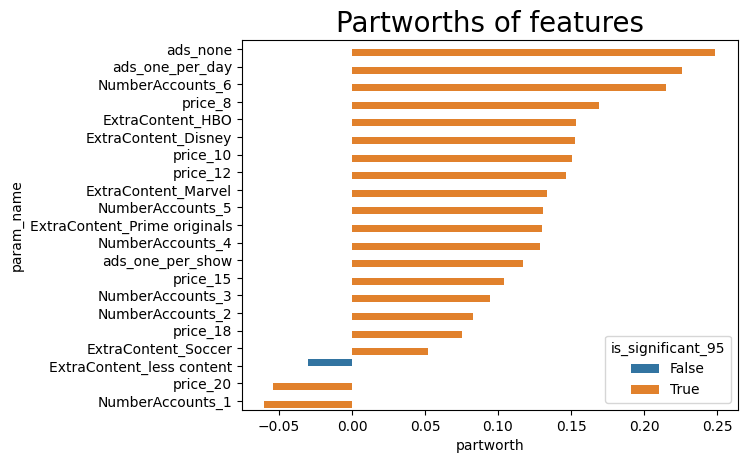

In [ ]:
#Plotting
plt.title('Partworths of features', fontsize=20)
sns.barplot(data=df_results, x='partworth', y='param_name', orient='h', hue='is_significant_95')
plt.show()

# Specific drivers

### Ads

In [ ]:
#Specific drivers - ads
attributes = []
coefficients = []
for i in range(len(df_results)):
  if df_results.iloc[i,0].find("ads") > -1:
    attributes.append(df_results.iloc[i,0])
    coefficients.append(df_results.iloc[i,1])

In [ ]:
print(attributes)
print(coefficients)

['ads_none', 'ads_one_per_day', 'ads_one_per_show']
[0.24875633032670794, 0.22583778940481702, 0.1174514175448525]


<ipython-input-27-4dacd5c67b66>:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  (markers, stemlines, baseline) = plt.stem (attributes, coefficients, use_line_collection = True)


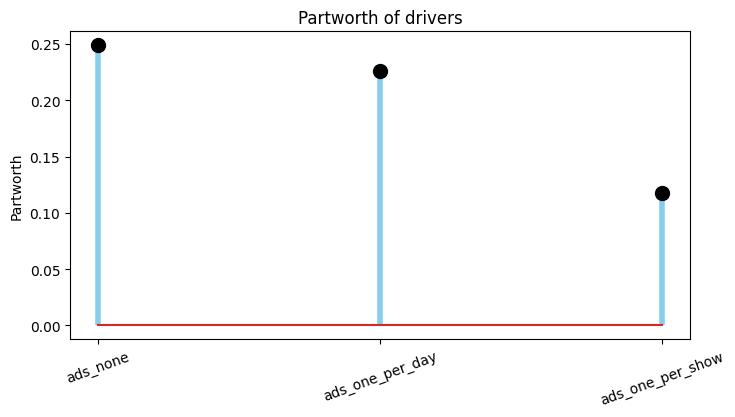

In [ ]:
#plotting ads
f, ax = plt.subplots (figsize=(8,4))
plt.title("Partworth of drivers")
(markers, stemlines, baseline) = plt.stem (attributes, coefficients, use_line_collection = True)
plt.setp(stemlines, linestyle = '-', color='skyblue', linewidth = 4)
plt.setp(markers, color='black', markersize = 10)
plt.ylabel('Partworth', fontsize=10)
plt.xticks(fontsize=10, rotation=20)
plt.yticks(fontsize=10)
plt.show()

### Price

In [ ]:
#Specific drivers - price
attributes = []
coefficients = []
for i in range(len(df_results)):
  if df_results.iloc[i,0].find("price") > -1:
    attributes.append(df_results.iloc[i,0])
    coefficients.append(df_results.iloc[i,1])

<ipython-input-29-cc93886423f7>:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  (markers, stemlines, baseline) = plt.stem (attributes, coefficients, use_line_collection = True)


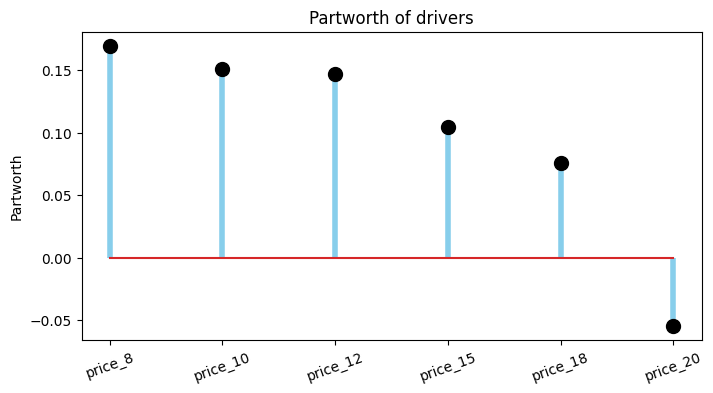

In [ ]:
#plotting price
f, ax = plt.subplots (figsize=(8,4))
plt.title("Partworth of drivers")
(markers, stemlines, baseline) = plt.stem (attributes, coefficients, use_line_collection = True)
plt.setp(stemlines, linestyle = '-', color='skyblue', linewidth = 4)
plt.setp(markers, color='black', markersize = 10)
plt.ylabel('Partworth', fontsize=10)
plt.xticks(fontsize=10, rotation=20)
plt.yticks(fontsize=10)
plt.show()

### Number of accounts

In [ ]:
#Specific drivers - NumberAccounts
attributes = []
coefficients = []
for i in range(len(df_results)):
  if df_results.iloc[i,0].find("NumberAccounts") > -1:
    attributes.append(df_results.iloc[i,0])
    coefficients.append(df_results.iloc[i,1])

<ipython-input-33-7a8dfd04f4cd>:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  (markers, stemlines, baseline) = plt.stem (attributes, coefficients, use_line_collection = True)


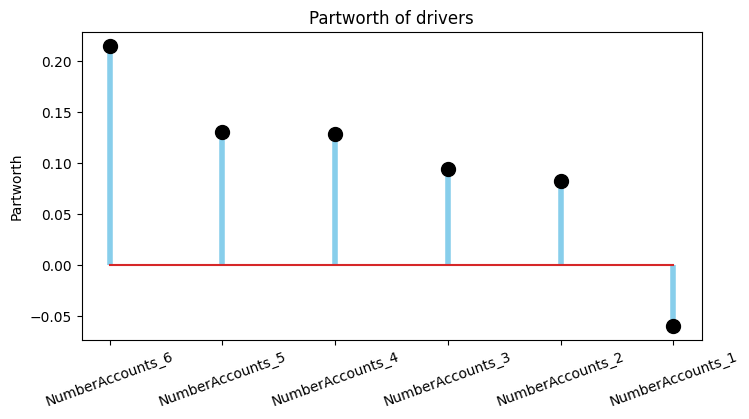

In [ ]:
#plotting NumberAccounts
f, ax = plt.subplots (figsize=(8,4))
plt.title("Partworth of drivers")
(markers, stemlines, baseline) = plt.stem (attributes, coefficients, use_line_collection = True)
plt.setp(stemlines, linestyle = '-', color='skyblue', linewidth = 4)
plt.setp(markers, color='black', markersize = 10)
plt.ylabel('Partworth', fontsize=10)
plt.xticks(fontsize=10, rotation=20)
plt.yticks(fontsize=10)
plt.show()

### Extra content

In [ ]:
#Specific drivers - ExtraContent
attributes = []
coefficients = []
for i in range(len(df_results)):
  if df_results.iloc[i,0].find("ExtraContent") > -1:
    attributes.append(df_results.iloc[i,0])
    coefficients.append(df_results.iloc[i,1])

<ipython-input-35-61ab88e3ba73>:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  (markers, stemlines, baseline) = plt.stem (attributes, coefficients, use_line_collection = True)


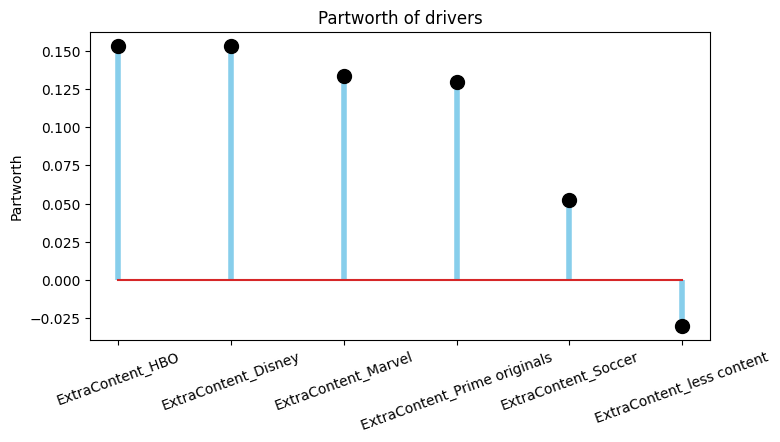

In [ ]:
#plotting ExtraContent
f, ax = plt.subplots (figsize=(8,4))
plt.title("Partworth of drivers")
(markers, stemlines, baseline) = plt.stem (attributes, coefficients, use_line_collection = True)
plt.setp(stemlines, linestyle = '-', color='skyblue', linewidth = 4)
plt.setp(markers, color='black', markersize = 10)
plt.ylabel('Partworth', fontsize=10)
plt.xticks(fontsize=10, rotation=20)
plt.yticks(fontsize=10)
plt.show()

# Feature importance

In [ ]:
#Coefficient of features
features_part_worth = dict()
for key, coeff in model.params.items():
  split_key = key.split('_')
  feature = split_key[0]
  if feature not in features_part_worth:
    features_part_worth[feature] = list()
  features_part_worth[feature].append(coeff)

features_part_worth

{'NumberAccounts': [-0.05999160933742071,
  0.08260496266776315,
  0.09470569527677665,
  0.1289086230854451,
  0.13060993233162688,
  0.21520793325218607],
 'price': [0.16934283127678523,
  0.15084555117115453,
  0.14651728664654867,
  0.10423235524421481,
  0.07540075639421506,
  -0.054293243456541074],
 'ExtraContent': [0.15295168988347627,
  0.1533636746850919,
  0.13368116308585395,
  0.12982664362141041,
  0.05228328785011105,
  -0.03006092184956643],
 'ads': [0.24875633032670794, 0.22583778940481702, 0.1174514175448525]}

In [ ]:
#Feature importance: max(x) - min(x)
importance_per_feature = {k: max(v) - min(v) for k, v in features_part_worth.items()}
importance_per_feature

{'NumberAccounts': 0.27519954258960677,
 'price': 0.2236360747333263,
 'ExtraContent': 0.18342459653465834,
 'ads': 0.13130491278185544}

In [ ]:
#check total
total_feature_importance = sum(importance_per_feature.values())
total_feature_importance

0.8135651266394468

In [ ]:
#relative importance
relative_importance_per_feature = {
    k: round(100* v/total_feature_importance,2) for k, v in importance_per_feature.items()
}
relative_importance_per_feature

{'NumberAccounts': 33.83, 'price': 27.49, 'ExtraContent': 22.55, 'ads': 16.14}

In [ ]:
#build a dataframe for plotting
df_importances = pd.DataFrame(list(relative_importance_per_feature.items()),
                              columns = ['features', 'relative_importance']
                              ).sort_values(by='relative_importance')
df_importances

,features,relative_importance
3,ads,16.14
2,ExtraContent,22.55
1,price,27.49
0,NumberAccounts,33.83


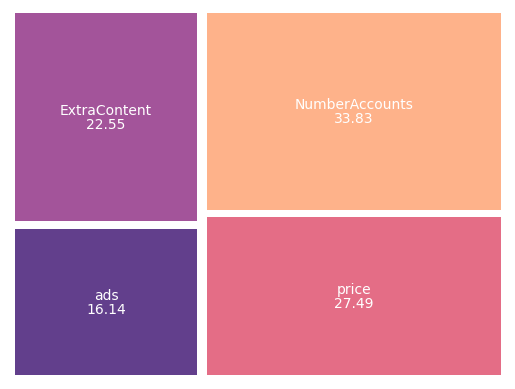

In [ ]:
#Treemap
squarify.plot(sizes = df_importances['relative_importance'],
              label = df_importances['features'],
              alpha = 0.8,
              color = sns.color_palette("magma", len(df_importances['relative_importance'])),
              value = df_importances['relative_importance'],
              text_kwargs = {'fontsize': 10, 'color': 'white'},
              pad = True
              )
plt.axis("off")
plt.show()

# Interaction term

In [ ]:
#create interaction term
df['content_ads'] = df.ExtraContent + '_' + df.ads
df

,customerid,NumberAccounts,price,ExtraContent,ads,selected,content_ads
0,7,2,10,HBO,one_per_day,1,HBO_one_per_day
1,7,6,8,Marvel,one_per_show,1,Marvel_one_per_show
2,7,4,15,Disney,one_per_day,1,Disney_one_per_day
3,7,5,10,HBO,one_per_day,1,HBO_one_per_day
4,7,1,20,Soccer,one_per_show,1,Soccer_one_per_show
...,...,...,...,...,...,...,...
2995,900,1,15,Marvel,one_per_day,1,Marvel_one_per_day
2996,900,2,10,HBO,none,0,HBO_none
2997,900,5,8,Soccer,one_per_show,0,Soccer_one_per_show
2998,900,2,8,Marvel,one_per_day,0,Marvel_one_per_day


In [ ]:
#remove ExtraContent and ads columns
df_interaction = df.drop(['ExtraContent', 'ads'], axis=1)
df_interaction.head()

,customerid,NumberAccounts,price,selected,content_ads
0,7,2,10,1,HBO_one_per_day
1,7,6,8,1,Marvel_one_per_show
2,7,4,15,1,Disney_one_per_day
3,7,5,10,1,HBO_one_per_day
4,7,1,20,1,Soccer_one_per_show


In [ ]:
# isolate X and y
y = df_interaction.selected
X = df_interaction.drop(['customerid', 'selected'], axis=1)

In [ ]:
#Dummy variables
X_dummy = pd.get_dummies(X, columns = X.columns)
X_dummy.head()

,NumberAccounts_1,NumberAccounts_2,NumberAccounts_3,NumberAccounts_4,NumberAccounts_5,NumberAccounts_6,price_8,price_10,price_12,price_15,...,content_ads_Marvel_one_per_show,content_ads_Prime originals_none,content_ads_Prime originals_one_per_day,content_ads_Prime originals_one_per_show,content_ads_Soccer_none,content_ads_Soccer_one_per_day,content_ads_Soccer_one_per_show,content_ads_less content_none,content_ads_less content_one_per_day,content_ads_less content_one_per_show
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
#Building model
it_model = sm.OLS(y, X_dummy, family=sm.families.Binomial()).fit()
it_model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               selected   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     10.56
Date:                Tue, 26 Sep 2023   Prob (F-statistic):           1.31e-42
Time:                        07:10:59   Log-Likelihood:                -2039.9
No. Observations:                3000   AIC:                             4136.
Df Residuals:                    2972   BIC:                             4304.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
NumberAccounts_1                             0.0524      0.020      2.594      0.010       0.013       0.092
NumberAccounts_2                             0.1981      0.021      9.492      0.000       0.157       0.239
NumberAccounts_3                             0.2069      0.021     10.003      0.000       0.166       0.247
NumberAccounts_4                             0.2408      0.020     12.242      0.000       0.202       0.279
NumberAccounts_5                             0.2431      0.020     12.227      0.000       0.204       0.282
NumberAccounts_6                             0.3283      0.019     17.227      0.000       0.291       0.366
price_8                                      0.2826      0.020     14.176      0.000       0.244       0.322
price_10                                     0.2633      0.020     12.884      0.000       0.223       0.303
price_12                                     0.2610      0.019     13.530      0.000       0.223       0.299
price_15                                     0.2165      0.020     10.922      0.000       0.178       0.255
price_18                                     0.1882      0.020      9.184      0.000       0.148       0.228
price_20                                     0.0578      0.020      2.853      0.004       0.018       0.098
content_ads_Disney_none                      0.1495      0.035      4.215      0.000       0.080       0.219
content_ads_Disney_one_per_day               0.1973      0.039      5.013      0.000       0.120       0.275
content_ads_Disney_one_per_show              0.0345      0.037      0.937      0.349      -0.038       0.107
content_ads_HBO_none                         0.1939      0.036      5.390      0.000       0.123       0.264
content_ads_HBO_one_per_day                  0.1901      0.035      5.388      0.000       0.121       0.259
content_ads_HBO_one_per_show                -0.0124      0.036     -0.341      0.733      -0.084       0.059
content_ads_Marvel_none                      0.1314      0.035      3.716      0.000       0.062       0.201
content_ads_Marvel_one_per_day               0.1254      0.036      3.454      0.001       0.054       0.197
content_ads_Marvel_one_per_show              0.0582      0.035      1.658      0.097      -0.011       0.127
content_ads_Prime originals_none             0.1315      0.037      3.595      0.000       0.060       0.203
content_ads_Prime originals_one_per_day      0.1013      0.036      2.811      0.005       0.031       0.172
content_ads_Prime originals_one_per_show     0.0752      0.038      2.002      0.045       0.002       0.149
content_ads_Soccer_none                      0.1044      0.036      2.908      0.004       0.034       0.175
content_ads_Soccer_one_per_day 

# Interaction terms - Results

In [ ]:
#DF with results
df_results_it = pd.DataFrame({'param_name': it_model.params.keys(),
                            'partworth': it_model.params.values}).sort_values(by = 'partworth')
df_results_it.head()

,param_name,partworth
29,content_ads_less content_one_per_show,-0.167056
26,content_ads_Soccer_one_per_show,-0.045434
28,content_ads_less content_one_per_day,-0.028690
17,content_ads_HBO_one_per_show,-0.012399
25,content_ads_Soccer_one_per_day,0.012522


In [ ]:
#looking at specific drivers
attributes = []
coefficients = []
for i in range(len(df_results)):
  if df_results_it.iloc[i,0].find('content_ads')>-1:
    if df_results_it.iloc[i,0].find('none') == -1:
      attributes.append(df_results_it.iloc[i,0])
      coefficients.append(df_results_it.iloc[i,1])

In [ ]:
attributes

['content_ads_less content_one_per_show',
 'content_ads_Soccer_one_per_show',
 'content_ads_less content_one_per_day',
 'content_ads_HBO_one_per_show',
 'content_ads_Soccer_one_per_day',
 'content_ads_Disney_one_per_show',
 'content_ads_Marvel_one_per_show',
 'content_ads_Prime originals_one_per_show',
 'content_ads_Prime originals_one_per_day',
 'content_ads_Marvel_one_per_day',
 'content_ads_HBO_one_per_day',
 'content_ads_Disney_one_per_day']

In [ ]:
coefficients

[-0.1670559336484907,
 -0.04543358928810412,
 -0.02868995693583428,
 -0.012399411596155686,
 0.01252199395079281,
 0.03448871543733595,
 0.05817954036057298,
 0.07521924748886835,
 0.10126269299608776,
 0.12539669521617575,
 0.1900813489569567,
 0.197338438880773]

<ipython-input-79-ad155129c05a>:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  (markers, stemlines, baseline) = plt.stem (attributes, coefficients, use_line_collection = True)


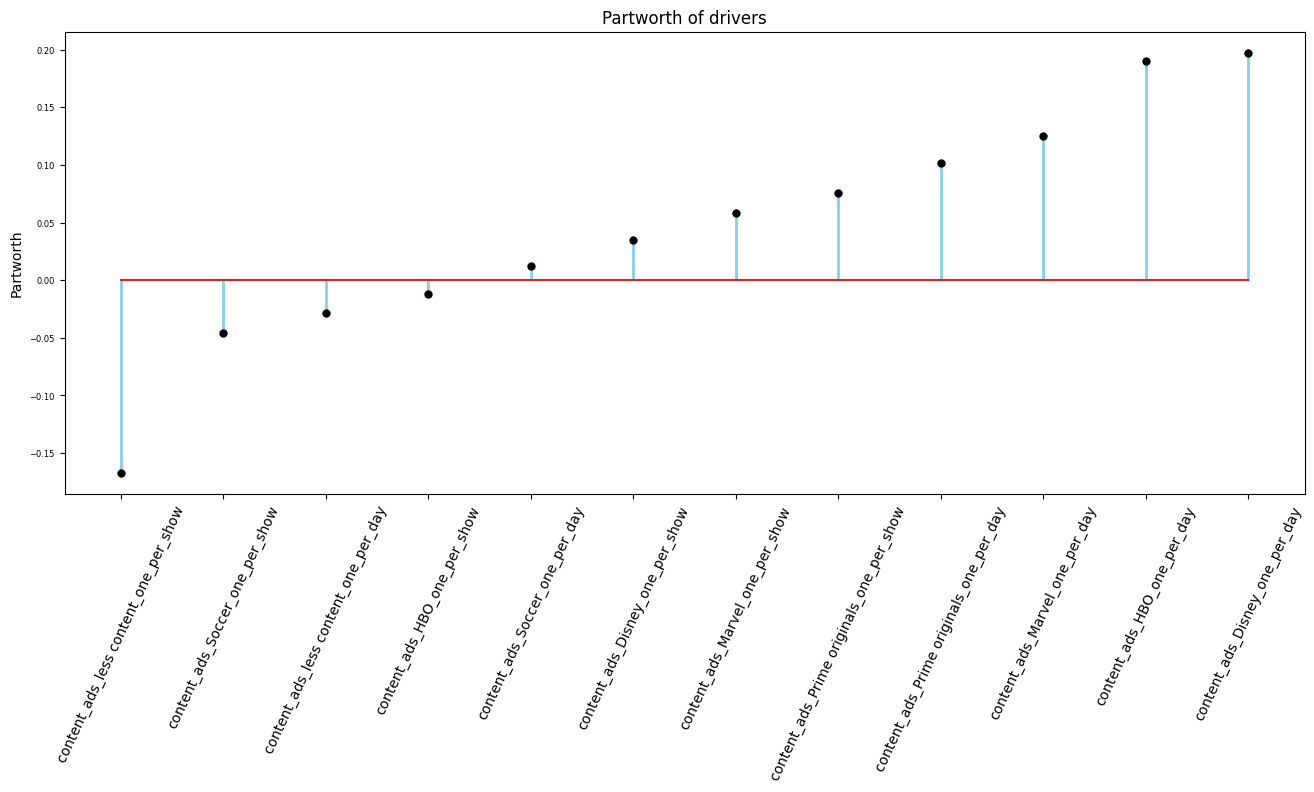

In [ ]:
#plotting
f, ax = plt.subplots (figsize=(16,6))
plt.title("Partworth of drivers")
(markers, stemlines, baseline) = plt.stem (attributes, coefficients, use_line_collection = True)
plt.setp(stemlines, linestyle = '-', color='skyblue', linewidth = 2)
plt.setp(markers, color='black', markersize = 5)
plt.ylabel('Partworth', fontsize=10)
plt.xticks(fontsize=10, rotation=65)
plt.yticks(fontsize=6)
plt.show()